# Simulación de un motor con $G(s)=d/(s + b)$
## Entorno: Jupyter Notebook

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

---

## Tabla de clases y métodos principales de NumPy

| **Clase / Objeto** | **Métodos principales** | **Descripción / Uso** |
|---------------------|-------------------------|------------------------|
| **`numpy.ndarray`** | `.shape`, `.dtype`, `.reshape()`, `.astype()`, `.flatten()`, `.transpose()`, `.sum()`, `.mean()`, `.std()`, `.dot()` | Clase central de NumPy: arreglo multidimensional eficiente. Permite operaciones matemáticas vectorizadas. |
| **`numpy.matrix`** | `.getA()`, `.getT()`, `.getH()`, `.getI()` | Clase especializada para álgebra lineal (matrices). Menos usada que `ndarray`, pero útil en operaciones matriciales clásicas. |
| **`numpy.random.Generator`** | `.integers()`, `.random()`, `.normal()`, `.choice()`, `.shuffle()` | Generador moderno de números aleatorios. Sustituye a `RandomState`. |
| **`numpy.dtype`** | `.name`, `.itemsize`, `.type` | Describe el tipo de datos de un `ndarray` (int, float, bool, etc.). |
| **`numpy.ufunc`** (funciones universales) | `.reduce()`, `.accumulate()`, `.outer()`, `.at()` | Funciones vectorizadas que operan elemento por elemento (ej. `np.add`, `np.multiply`). |
| **`numpy.char`** | `.add()`, `.multiply()`, `.center()`, `.capitalize()`, `.replace()` | Métodos para manipulación de cadenas sobre arreglos. |
| **`numpy.ma.MaskedArray`** | `.mask`, `.compressed()`, `.filled()` | Arreglos con soporte para valores ocultos o inválidos (útil en datos incompletos). |
| **`numpy.linalg`** (submódulo) | `inv()`, `det()`, `eig()`, `svd()`, `norm()` | Métodos de álgebra lineal: inversa, determinante, valores propios, descomposición SVD. |
| **`numpy.fft`** (submódulo) | `fft()`, `ifft()`, `rfft()`, `irfft()` | Transformadas rápidas de Fourier. |
| **`numpy.polynomial`** | `.Polynomial`, `.Chebyshev`, `.Legendre` | Clases para trabajar con polinomios y series ortogonales. |

---

## Notas de uso institucional
- **`ndarray`** es la base: todo NumPy gira en torno a él.  
- **`ufunc`** asegura operaciones vectorizadas sin bucles explícitos.  
- **Submódulos (`linalg`, `fft`, `random`)** extienden NumPy hacia aplicaciones científicas específicas.  
- Para **documentación reproducible**, conviene listar versiones de NumPy y dependencias (ej. BLAS/LAPACK).  

---

---

## Tabla de clases y métodos de `scipy.signal`

| **Clase / Objeto** | **Métodos / Funciones principales** | **Descripción / Uso** |
|---------------------|-------------------------------------|------------------------|
| **Filtros digitales (IIR/FIR)** | `butter()`, `cheby1()`, `cheby2()`, `ellip()`, `bessel()`, `firwin()`, `firwin2()` | Diseño de filtros digitales: Butterworth, Chebyshev, Elípticos, FIR. |
| **Transformadas y análisis** | `spectrogram()`, `welch()`, `periodogram()`, `stft()`, `istft()` | Análisis espectral y transformada corta de Fourier (STFT). |
| **Convolución y correlación** | `convolve()`, `correlate()`, `fftconvolve()`, `oaconvolve()`, `convolve2d()`, `correlate2d()` | Operaciones de convolución y correlación en 1D y 2D. |
| **Filtros y procesamiento** | `lfilter()`, `filtfilt()`, `sosfilt()`, `sosfiltfilt()`, `decimate()`, `resample()`, `resample_poly()` | Aplicación de filtros digitales, filtrado en fase cero, decimación y remuestreo. |
| **Diseño y análisis de sistemas** | `tf2zpk()`, `zpk2tf()`, `tf2sos()`, `sos2tf()`, `bilinear()`, `freqz()`, `sosfreqz()` | Conversión entre representaciones de sistemas (función de transferencia, polos/ceros, secciones de segundo orden). |
| **Detección de picos y envolventes** | `find_peaks()`, `peak_prominences()`, `peak_widths()`, `hilbert()` | Detección de picos en señales y análisis de envolventes mediante transformada de Hilbert. |
| **Ventanas** | `get_window()`, `windows.hann()`, `windows.hamming()`, `windows.blackman()`, `windows.kaiser()` | Generación de ventanas para análisis espectral y filtrado. |
| **Clases de sistemas** | `dlti`, `lti`, `TransferFunction`, `ZPK`, `StateSpace` | Representaciones de sistemas lineales invariantes en el tiempo (LTI) en distintas formas: función de transferencia, polos-ceros, espacio de estados. |
| **Funciones auxiliares** | `correlation_lags()`, `choose_conv_method()` | Cálculo de retardos en correlación y selección automática del mejor método de convolución. |

---

##  Puntos clave
- **`dlti` y derivados (`TransferFunction`, `ZPK`, `StateSpace`)** permiten modelar sistemas dinámicos, muy útiles en control y simulación.  
- **Filtros digitales** (`butter`, `cheby`, `ellip`) son esenciales para limpiar señales en proyectos de ingeniería biomédica, audio o telecomunicaciones.  
- **Métodos de convolución y correlación** son básicos para análisis de señales en tiempo y frecuencia.  
- **Funciones de espectro (`welch`, `spectrogram`)** permiten caracterizar ruido y componentes periódicas.  

---

In [5]:
d = 4.4   # ganancia del motor
b = 4   # coeficiente de amortiguamiento

# Definición de la función de transferencia
# G(s) = d / (s + b)

In [6]:
num=[d]
den=[1,b]
motor_tf=signal.TransferFunction(num,den)

# simulación con entrada escalón 

In [10]:
t=np.linspace(0,10,500)
amplitud_escalon=5.5
u_escalon=amplitud_escalon*np.ones_like(t)
t_out,y_out,x_out=signal.lsim(motor_tf,U=u_escalon,T=t)

---

##  Tabla de funciones de NumPy: `linspace` y `ones_like`

| **Función / Clase** | **Parámetros principales** | **Descripción / Uso** | **Ejemplo práctico** |
|----------------------|----------------------------|------------------------|-----------------------|
| **`numpy.linspace`** | - `start`: valor inicial<br>- `stop`: valor final<br>- `num`: número de puntos (default 50)<br>- `endpoint`: incluye el valor final (True/False)<br>- `retstep`: devuelve también el paso (True/False)<br>- `dtype`: tipo de dato | Genera un arreglo de valores **uniformemente espaciados** entre dos límites. Ideal para simulaciones, graficación y discretización de intervalos. | ```python\nimport numpy as np\nx = np.linspace(0, 10, num=5)\nprint(x)\n# [ 0.  2.5  5.  7.5 10. ]\n``` |
| **`numpy.ones_like`** | - `a`: arreglo de referencia<br>- `dtype`: tipo de dato<br>- `order`: orden de memoria (‘C’, ‘F’)<br>- `subok`: hereda subclases (True/False)<br>- `shape`: forma opcional | Crea un arreglo de **unos** con la misma forma y tipo de datos que otro arreglo dado. Útil para inicialización de matrices y operaciones simbólicas. | ```python\nimport numpy as np\narr = np.array([1,2,3])\nunos = np.ones_like(arr)\nprint(unos)\n# [1 1 1]\n``` |

---

##  Notas institucionales
- **`linspace`** es clave para definir vectores de tiempo en simulaciones (ej. motor DC en JupyterLab).  
- **`ones_like`** se usa para inicializar matrices de control o vectores de referencia con valores constantes.  
- Ambas funciones garantizan **reproducibilidad y claridad** en flujos técnicos, evitando bucles manuales.  

---

## Tabla de `scipy.signal`: `lsim` y `TransferFunction`

| **Clase / Método** | **Parámetros principales** | **Descripción / Uso** | **Ejemplo práctico** |
|---------------------|----------------------------|------------------------|-----------------------|
| **`scipy.signal.TransferFunction`** | - `num`: coeficientes del numerador<br>- `den`: coeficientes del denominador<br>- `dt`: tiempo de muestreo (para sistemas discretos, opcional) | Representa un **sistema lineal invariante en el tiempo (LTI)** en forma de función de transferencia. Se usa para modelar sistemas físicos (ej. motor DC). | ```python\nfrom scipy.signal import TransferFunction\n# Sistema: H(s) = 1 / (s^2 + 2s + 1)\nsys = TransferFunction([1], [1, 2, 1])\n``` |
| **`scipy.signal.lsim`** | - `sys`: sistema LTI (ej. TransferFunction)<br>- `U`: señal de entrada<br>- `T`: vector de tiempo<br>- `X0`: condiciones iniciales (opcional) | Simula la **respuesta temporal de un sistema LTI** a una entrada arbitraria. Devuelve salida `yout` y estados internos `xout`. | ```python\nimport numpy as np\nfrom scipy.signal import lsim\nT = np.linspace(0, 10, 100)\nU = np.ones_like(T)  # entrada escalón\n_, yout, _ = lsim(sys, U, T)\n``` |

---

## Notas institucionales
- **`TransferFunction`** es ideal para documentar el modelo matemático del motor DC en forma de función de transferencia.  
- **`lsim`** permite simular la respuesta del sistema a entradas como escalón, rampa o señales arbitrarias.  
- Ambos métodos son parte del **ecosistema LTI de `scipy.signal`**, junto con `StateSpace`, `ZPK` y `dlti`.  
- Para reproducibilidad, siempre documenta los coeficientes del sistema y el vector de tiempo usado en la simulación.  

---

<function matplotlib.pyplot.show(close=None, block=None)>

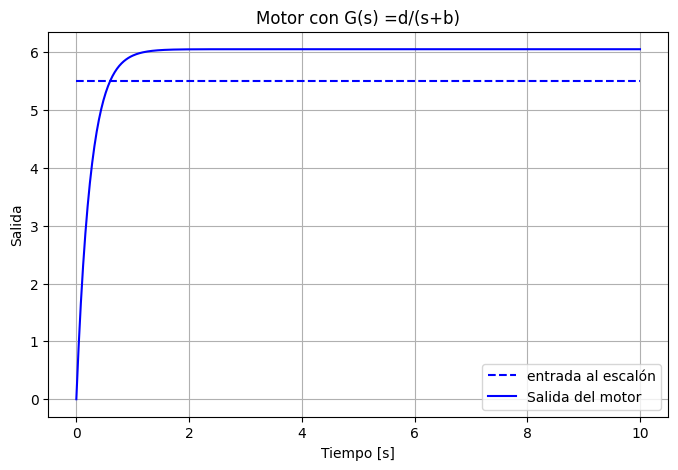

In [34]:
plt.figure(figsize=(8,5))
plt.plot(t,u_escalon,'b--',label="entrada al escalón")
plt.plot(t_out,y_out,'b',label="Salida del motor")
plt.title("Motor con G(s) =d/(s+b)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Salida")
plt.grid(True)
plt.legend()
plt.savefig("motor_CD.png", dpi=300)
plt.show

---

## Tabla de clases y métodos principales de SymPy

| **Clase / Objeto** | **Métodos / Funciones principales** | **Descripción / Uso** |
|---------------------|-------------------------------------|------------------------|
| **`Symbol`** | `sp.Symbol()`, `.is_real`, `.is_integer` | Representa variables simbólicas. Base para cualquier expresión algebraica. |
| **`Expr`** | `.simplify()`, `.expand()`, `.subs()`, `.evalf()` | Clase base de todas las expresiones simbólicas. Permite simplificación, expansión y evaluación numérica. |
| **`Eq`** | `sp.Eq(lhs, rhs)` | Define ecuaciones simbólicas. Se usa en resolución de sistemas y ecuaciones diferenciales. |
| **`Function`** | `sp.Function('f')(x)`, `.diff()`, `.integrate()` | Representa funciones simbólicas definidas por el usuario. |
| **`Matrix`** | `.det()`, `.inv()`, `.eigenvals()`, `.LUdecomposition()` | Clase para álgebra lineal: matrices, determinantes, valores propios, descomposiciones. |
| **`Integral`** | `sp.integrate(expr, var)` | Representa integrales simbólicas definidas e indefinidas. |
| **`Derivative`** | `sp.diff(expr, var)` | Representa derivadas simbólicas de cualquier orden. |
| **`Series`** | `.series(x, x0, n)` | Expansión en series de Taylor/Laurent. |
| **`Poly`** | `.degree()`, `.coeffs()`, `.roots()`, `.factor()` | Clase para polinomios: factorización, raíces, coeficientes. |
| **`Rational`** | `sp.Rational(p, q)` | Representa números racionales exactos. |
| **`Integer` / `Float`** | `sp.Integer(5)`, `sp.Float(3.14)` | Representan números enteros y flotantes simbólicos. |
| **`LaplaceTransform`** | `sp.laplace_transform(f, t, s)`, `sp.inverse_laplace_transform(F, s, t)` | Transformada de Laplace directa e inversa. |
| **`FourierTransform`** | `sp.fourier_transform(f, t, w)`, `sp.inverse_fourier_transform(F, w, t)` | Transformadas de Fourier. |
| **`Solve` (función)** | `sp.solve(eq, var)`, `sp.solveset(eq, var)` | Resolver ecuaciones algebraicas y sistemas. |
| **`OdeSolver` (funciones)** | `sp.dsolve(eq, func)` | Resolver ecuaciones diferenciales ordinarias. |

---

## Notas institucionales
- **Clases base:** `Symbol`, `Expr`, `Eq` → todo flujo simbólico parte de ellas.  
- **Álgebra lineal:** `Matrix` es clave para modelado de sistemas.  
- **Transformadas:** `LaplaceTransform` y `FourierTransform` son esenciales en control y señales.  
- **Resolución simbólica:** `solve`, `dsolve` permiten automatizar ecuaciones algebraicas y diferenciales.  
- **Documentación reproducible:** siempre registrar versión de SymPy y dependencias (ej. mpmath).  

---